#**Install kaggle library to download the dataset**

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Download the datraset**

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# **Unzip the DataSet**

In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# **Showing the statistics how many pictures we have for training and for testing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/Training'
test_dir = '/content/Testing'

batch_size = 32
img_height = 300
img_width = 300

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=13,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=3,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names
train_dataset = train_dataset.cache().shuffle(1024).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


# **Represent these statistics using Graph**

<ipython-input-9-a61f37c5d059>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(total_class_counts))


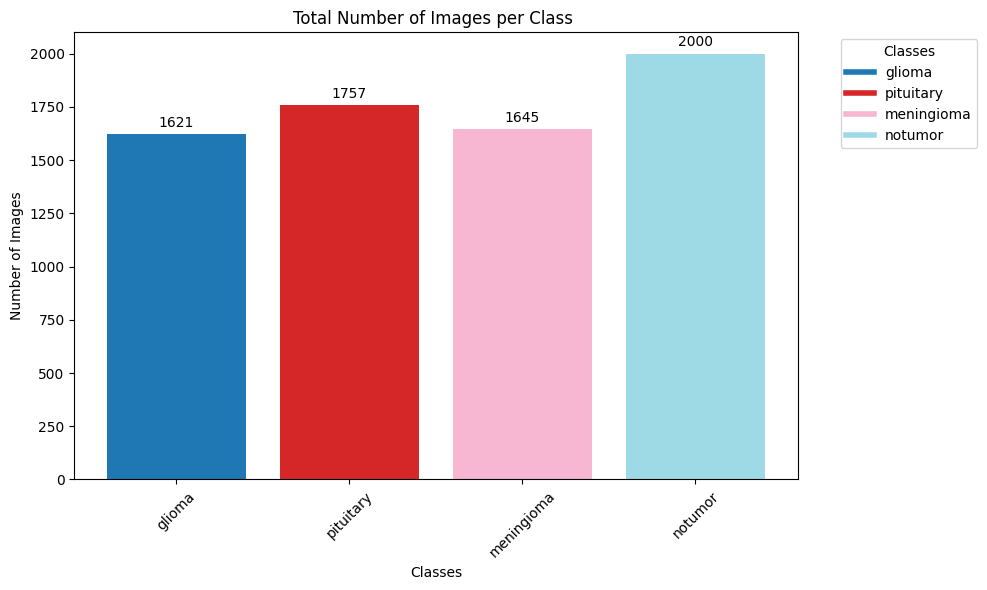

Total Number of Images per Class (Training + Testing):
glioma: 1621
pituitary: 1757
meningioma: 1645
notumor: 2000
Total Number of Images in Training Set: 5712
Total Number of Images in Testing Set: 1311


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define paths to your training and testing directories
train_dir = '/content/Training'
test_dir = '/content/Testing'

# Function to count number of images in each class folder
def count_images_in_classes(directory):
    classes = os.listdir(directory)
    class_counts = {}
    total_images = 0
    for cls in classes:
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[cls] = num_images
            total_images += num_images
    return class_counts, total_images

# Count images in training set
train_class_counts, train_total = count_images_in_classes(train_dir)

# Count images in testing set
test_class_counts, test_total = count_images_in_classes(test_dir)

# Combine counts from training and testing sets
total_class_counts = {}
for cls in train_class_counts:
    total_class_counts[cls] = train_class_counts[cls] + test_class_counts.get(cls, 0)

# Create a colormap
colors = cm.get_cmap('tab20', len(total_class_counts))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(total_class_counts.keys(), total_class_counts.values(), color=[colors(i) for i in range(len(total_class_counts))])

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, int(yval), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class ')
plt.xticks(rotation=45)

# Create a custom legend
legend_labels = total_class_counts.keys()
legend_colors = [colors(i) for i in range(len(total_class_counts))]
custom_legend = [plt.Line2D([0], [0], color=legend_colors[i], lw=4) for i in range(len(legend_labels))]
plt.legend(custom_legend, legend_labels, title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print total number of images in each class
print("Total Number of Images per Class (Training + Testing):")
for cls, count in total_class_counts.items():
    print(f"{cls}: {count}")

# Print total number of images in training and testing sets
print(f"Total Number of Images in Training Set: {train_total}")
print(f"Total Number of Images in Testing Set: {test_total}")


# **Plot some of Images**

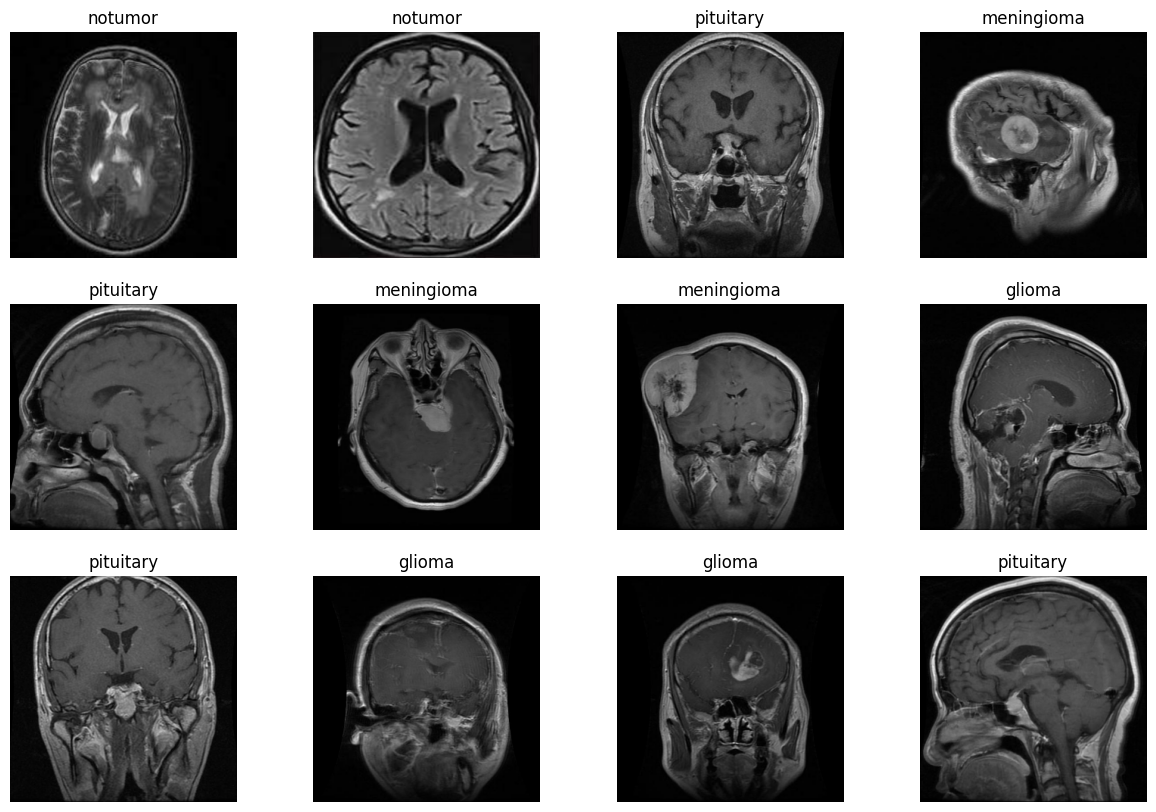

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 10))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


# **Import necessary libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# **Import train test dataset**

In [ ]:


# Directories
train_dir = '/content/Training'
test_dir = '/content/Testing'

# Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=vgg_preprocess,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


# **Import library for model building**

In [ ]:

# Model building functions
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# **Define function for model building**

In [ ]:


def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    base_model.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_vgg19_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    base_model.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_inception_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    base_model.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model



# **Evaluation and plotting functions**

In [ ]:


# Evaluation and plotting functions
def evaluate_model(model, test_generator):
    test_generator.reset()
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print(report)

    cm = confusion_matrix(true_classes, predicted_classes)
    print(cm)

    return report, cm

def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# **VGG19 Model**

## **Build the model**

In [ ]:
# Example usage
vgg19_model = build_vgg19_model()



80134624/80134624 [==============================] - 1s 0us/step


## **Fit the model**

In [ ]:
history = vgg19_model.fit(
        train_generator,
        epochs=50,
        validation_data=test_generator)


Epoch 1/50
179/179 [==============================] - 104s 522ms/step - loss: 2.0493 - accuracy: 0.6541 - val_loss: 0.6800 - val_accuracy: 0.7567
Epoch 2/50
179/179 [==============================] - 85s 474ms/step - loss: 0.6992 - accuracy: 0.7486 - val_loss: 0.4642 - val_accuracy: 0.8215
Epoch 3/50
179/179 [==============================] - 87s 486ms/step - loss: 0.6055 - accuracy: 0.7826 - val_loss: 0.4258 - val_accuracy: 0.8276
Epoch 4/50
179/179 [==============================] - 85s 475ms/step - loss: 0.5482 - accuracy: 0.7903 - val_loss: 0.4244 - val_accuracy: 0.8413
Epoch 5/50
179/179 [==============================] - 89s 499ms/step - loss: 0.4925 - accuracy: 0.8155 - val_loss: 0.3856 - val_accuracy: 0.8436
Epoch 6/50
179/179 [==============================] - 90s 502ms/step - loss: 0.4561 - accuracy: 0.8298 - val_loss: 0.3852 - val_accuracy: 0.8459
Epoch 7/50
179/179 [==============================] - 87s 485ms/step - loss: 0.4463 - accuracy: 0.8349 - val_loss: 0.3565 - val_a

## **Evaluate the VGG19 model**

In [ ]:


# Evaluate the model
report, cm = evaluate_model(vgg19_model, test_generator)


41/41 [==============================] - 12s 262ms/step
              precision    recall  f1-score   support

      glioma       0.92      0.89      0.91       300
  meningioma       0.90      0.87      0.89       306
     notumor       0.99      0.99      0.99       405
   pituitary       0.94      0.99      0.96       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311

[[268  27   2   3]
 [ 20 267   4  15]
 [  2   2 400   1]
 [  2   1   0 297]]


## **Plot confusion matrix and Training hostory**

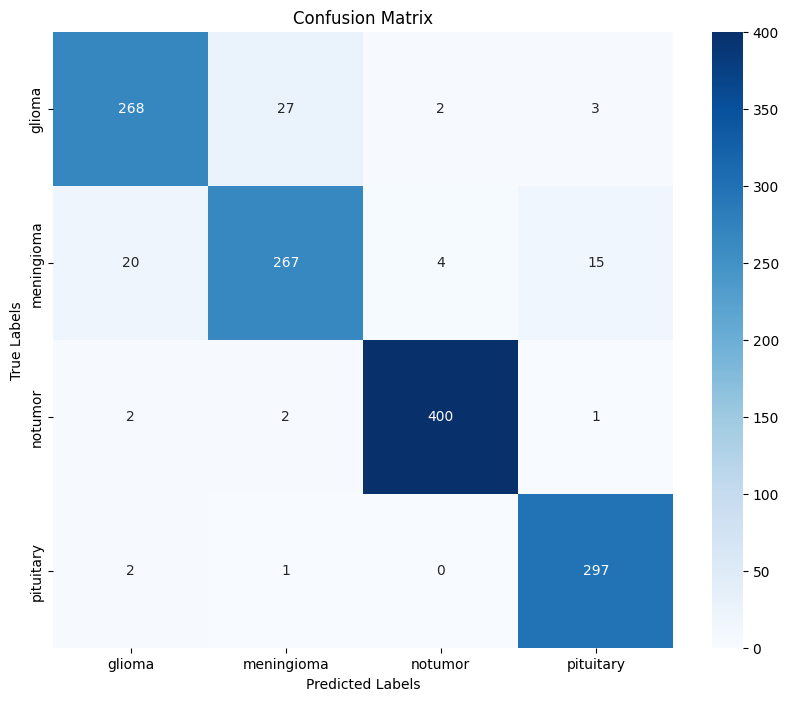

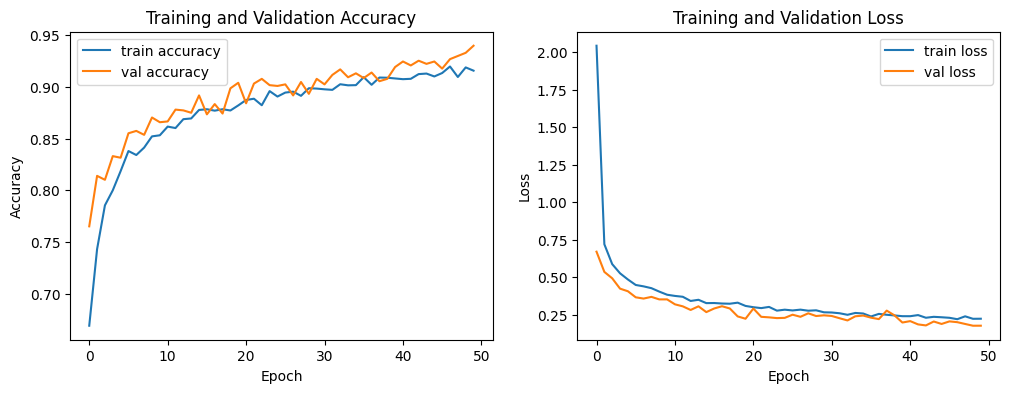

In [ ]:

# Plot the confusion matrix
class_labels = list(test_generator.class_indices.keys())
plot_confusion_matrix(cm, class_labels)

# Plot the training history
plot_training_history(history)

# **CNN Model**

## **Build the model**

In [ ]:
# Example usage
cnn_model = build_cnn_model()



## **Fit the model**

In [ ]:
history = cnn_model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)


Epoch 1/50
179/179 [==============================] - 90s 445ms/step - loss: 6.3187 - accuracy: 0.4837 - val_loss: 1.0034 - val_accuracy: 0.6072
Epoch 2/50
179/179 [==============================] - 80s 449ms/step - loss: 1.0057 - accuracy: 0.5800 - val_loss: 0.9074 - val_accuracy: 0.6438
Epoch 3/50
179/179 [==============================] - 78s 437ms/step - loss: 0.9340 - accuracy: 0.6257 - val_loss: 0.8294 - val_accuracy: 0.6995
Epoch 4/50
179/179 [==============================] - 77s 430ms/step - loss: 0.8860 - accuracy: 0.6385 - val_loss: 0.8292 - val_accuracy: 0.6606
Epoch 5/50
179/179 [==============================] - 77s 432ms/step - loss: 0.8629 - accuracy: 0.6549 - val_loss: 0.9423 - val_accuracy: 0.5759
Epoch 6/50
179/179 [==============================] - 78s 434ms/step - loss: 0.8093 - accuracy: 0.6644 - val_loss: 0.8394 - val_accuracy: 0.6445
Epoch 7/50
179/179 [==============================] - 77s 433ms/step - loss: 0.7633 - accuracy: 0.6957 - val_loss: 0.7344 - val_ac

## **Evaluate the model**

In [ ]:


# Evaluate the model
report, cm = evaluate_model(cnn_model, test_generator)


41/41 [==============================] - 8s 190ms/step
              precision    recall  f1-score   support

      glioma       0.98      0.69      0.81       300
  meningioma       0.79      0.57      0.66       306
     notumor       0.90      0.96      0.93       405
   pituitary       0.67      1.00      0.80       300

    accuracy                           0.81      1311
   macro avg       0.83      0.80      0.80      1311
weighted avg       0.84      0.81      0.81      1311

[[206  39   2  53]
 [  4 174  42  86]
 [  0   7 388  10]
 [  0   0   0 300]]


## **Plot The result**

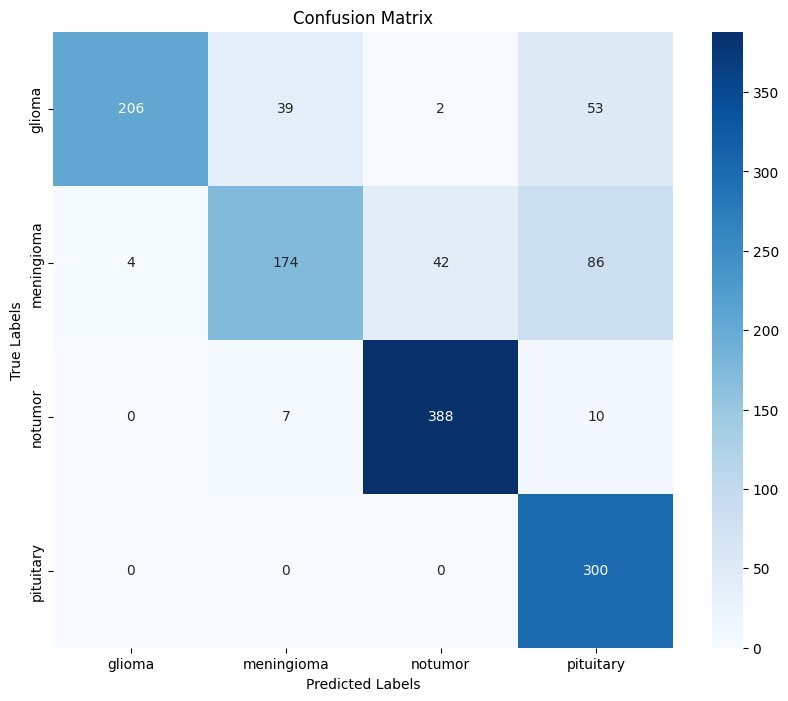

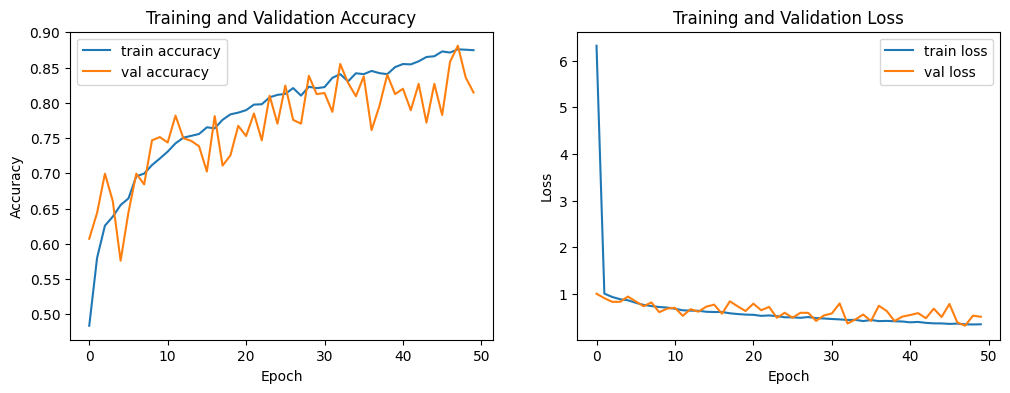

In [ ]:

# Plot the confusion matrix
class_labels = list(test_generator.class_indices.keys())
plot_confusion_matrix(cm, class_labels)

# Plot the training history
plot_training_history(history)

# **inception Model**

## **Build the model**

In [ ]:
# Example usage
inception_model = build_inception_model()



87910968/87910968 [==============================] - 1s 0us/step


## **Fit the Model**

In [ ]:
history = inception_model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)


Epoch 1/50
179/179 [==============================] - 102s 509ms/step - loss: 11.5851 - accuracy: 0.4258 - val_loss: 1.7272 - val_accuracy: 0.4432
Epoch 2/50
179/179 [==============================] - 80s 445ms/step - loss: 1.4797 - accuracy: 0.4468 - val_loss: 1.2379 - val_accuracy: 0.4539
Epoch 3/50
179/179 [==============================] - 81s 453ms/step - loss: 1.2429 - accuracy: 0.4743 - val_loss: 1.2417 - val_accuracy: 0.4760
Epoch 4/50
179/179 [==============================] - 80s 449ms/step - loss: 1.2095 - accuracy: 0.4841 - val_loss: 1.1822 - val_accuracy: 0.4661
Epoch 5/50
179/179 [==============================] - 80s 446ms/step - loss: 1.1687 - accuracy: 0.4755 - val_loss: 1.0941 - val_accuracy: 0.5126
Epoch 6/50
179/179 [==============================] - 82s 456ms/step - loss: 1.1484 - accuracy: 0.4905 - val_loss: 1.0796 - val_accuracy: 0.5309
Epoch 7/50
179/179 [==============================] - 79s 442ms/step - loss: 1.1100 - accuracy: 0.5231 - val_loss: 1.1389 - val_

## Evaluate the model

In [ ]:


# Evaluate the model
report, cm = evaluate_model(inception_model, test_generator)


41/41 [==============================] - 5s 97ms/step
              precision    recall  f1-score   support

      glioma       0.81      0.39      0.52       300
  meningioma       0.56      0.25      0.34       306
     notumor       0.72      0.80      0.76       405
   pituitary       0.47      0.92      0.62       300

    accuracy                           0.60      1311
   macro avg       0.64      0.59      0.56      1311
weighted avg       0.65      0.60      0.58      1311

[[116  50   6 128]
 [ 13  75  98 120]
 [ 12   7 324  62]
 [  2   1  22 275]]


## **Plot the result**

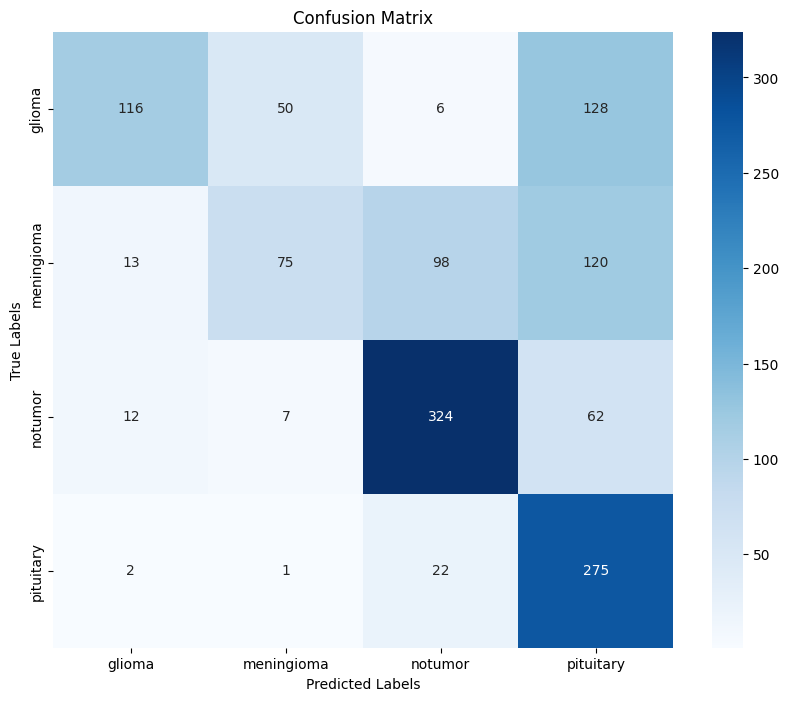

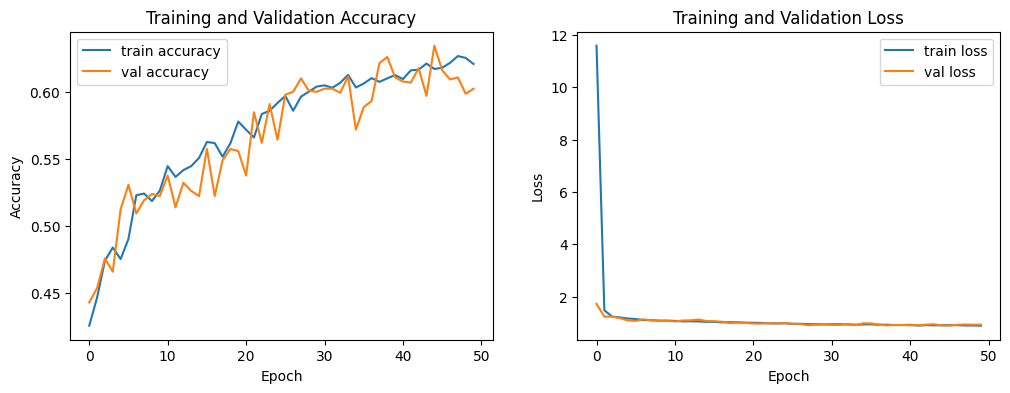

In [ ]:

# Plot the confusion matrix
class_labels = list(test_generator.class_indices.keys())
plot_confusion_matrix(cm, class_labels)

# Plot the training history
plot_training_history(history)

# **VGG16 Model**

## **Build the model**

In [ ]:
# Example usage
vgg16_model = build_vgg16_model()



58889256/58889256 [==============================] - 0s 0us/step


##  **Fit the model**

In [ ]:
history = vgg16_model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)


Epoch 1/50
179/179 [==============================] - 106s 535ms/step - loss: 2.4933 - accuracy: 0.6478 - val_loss: 0.6563 - val_accuracy: 0.7803
Epoch 2/50
179/179 [==============================] - 88s 490ms/step - loss: 0.7424 - accuracy: 0.7349 - val_loss: 0.4986 - val_accuracy: 0.8223
Epoch 3/50
179/179 [==============================] - 87s 483ms/step - loss: 0.5988 - accuracy: 0.7796 - val_loss: 0.4539 - val_accuracy: 0.8291
Epoch 4/50
179/179 [==============================] - 87s 488ms/step - loss: 0.5364 - accuracy: 0.8044 - val_loss: 0.4316 - val_accuracy: 0.8452
Epoch 5/50
179/179 [==============================] - 88s 489ms/step - loss: 0.4829 - accuracy: 0.8232 - val_loss: 0.3938 - val_accuracy: 0.8474
Epoch 6/50
179/179 [==============================] - 94s 526ms/step - loss: 0.4541 - accuracy: 0.8270 - val_loss: 0.3962 - val_accuracy: 0.8490
Epoch 7/50
179/179 [==============================] - 87s 483ms/step - loss: 0.4316 - accuracy: 0.8381 - val_loss: 0.3723 - val_a

## **Evaluate the model**

In [ ]:


# Evaluate the model
report, cm = evaluate_model(vgg16_model, test_generator)


41/41 [==============================] - 6s 132ms/step
              precision    recall  f1-score   support

      glioma       0.97      0.83      0.89       300
  meningioma       0.84      0.88      0.86       306
     notumor       0.98      0.99      0.98       405
   pituitary       0.91      0.99      0.95       300

    accuracy                           0.93      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.93      0.93      1311

[[248  47   1   4]
 [  7 270   7  22]
 [  1   3 399   2]
 [  0   2   1 297]]


## ***Plot the Results***

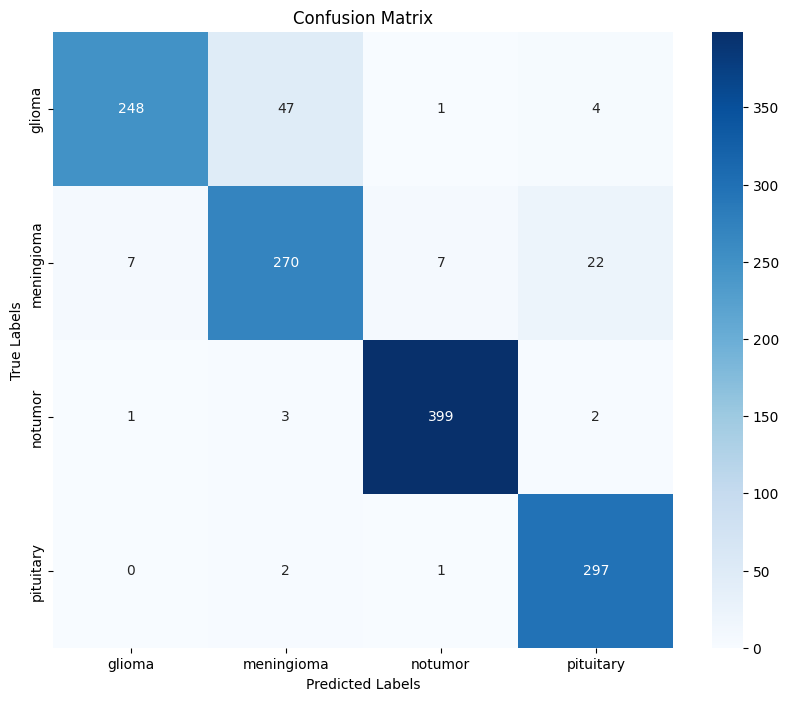

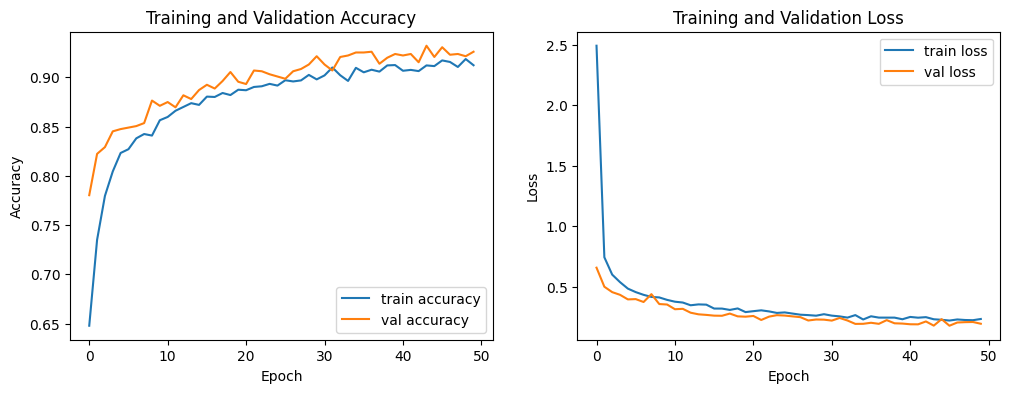

In [ ]:

# Plot the confusion matrix
class_labels = list(test_generator.class_indices.keys())
plot_confusion_matrix(cm, class_labels)

# Plot the training history
plot_training_history(history)